<a href="https://colab.research.google.com/github/chirag-miskin/Covid-Detection-using-Xrays/blob/main/Covid_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

 """ Go to kaggle account and create a new API token 
 which will be downloaded as a json file in your local disk
 Upload that json file here"""

In [53]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [54]:
! chmod 600 ~/.kaggle/kaggle.json

In [55]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              229KB  2021-06-19 20:05:51           7949  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4834  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1640  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2262  
mathurinache/twitter-edge-nodes                               Tw

In [56]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
!unzip "/content/covid19-radiography-database.zip"

Archive:  /content/covid19-radiography-database.zip
replace COVID-19_Radiography_Dataset/COVID.metadata.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace COVID-19_Radiography_Dataset/COVID.metadata.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace COVID-19_Radiography_Dataset/COVID/COVID-1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: none
replace COVID-19_Radiography_Dataset/COVID/COVID-10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


## Starting the Task

In [58]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

In [59]:
covid_imgs = pd.read_excel("./COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
covid_imgs.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [60]:
opacity_images = pd.read_excel("./COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx")
opacity_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [61]:
pneumonia_images = pd.read_excel("./COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
pneumonia_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [62]:
normal_images = pd.read_excel("./COVID-19_Radiography_Dataset/Normal.metadata.xlsx")
normal_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


## Working with Images

In [63]:
ROOT_DIR = "/content/COVID-19_Radiography_Dataset/"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

NEW_DIR = "/content/all_images/"

In [64]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

Already Exist


In [65]:
# lets visualise the number of images in each category
counter = {'COVID':0,'Lung_Opacity':0,'Normal':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter

{'COVID': 8, 'Lung_Opacity': 6012, 'Normal': 5492, 'Viral Pneumonia': 45}

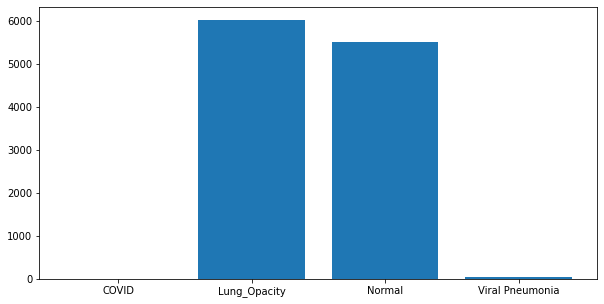

In [66]:
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

In [67]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

In [68]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/validation"
test_path   = "/content/all_images/train_test_split/test"

## Working on the files

In [69]:
# Make imports
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [70]:
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    shear_range=0.2)
train = train_data_gen.flow_from_directory(directory=train_path, target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [71]:
validattion_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid = validattion_data_gen.flow_from_directory(directory=valid_path, target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [72]:
test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test = test_data_gen.flow_from_directory(directory=test_path, target_size=(224,224), shuffle=False)

Found 800 images belonging to 2 classes.


In [73]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

## To visualise the images

In [74]:
t_img, label = train.next()

In [75]:
# function when called will plot the images

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  for im,l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


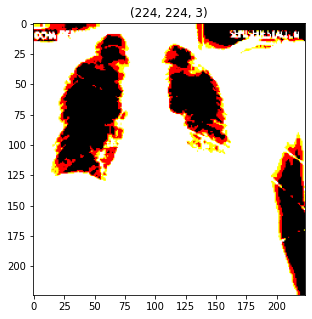

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


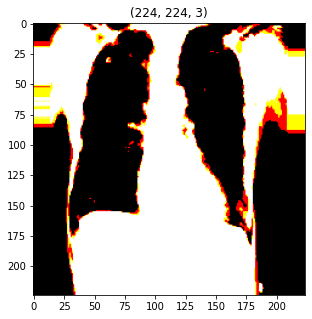

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


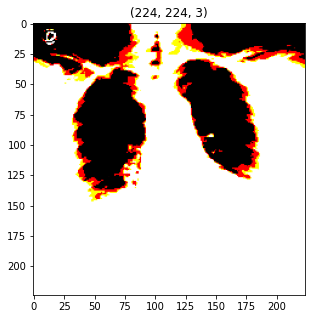

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


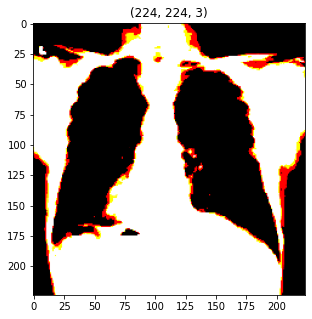

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


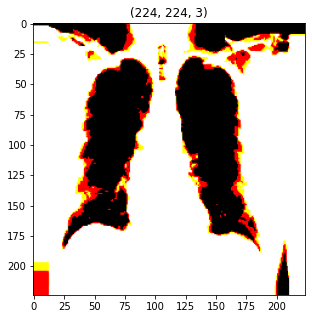

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


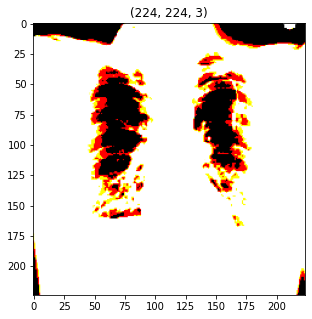

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


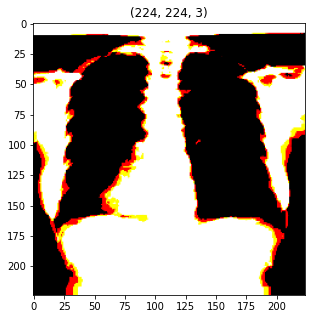

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


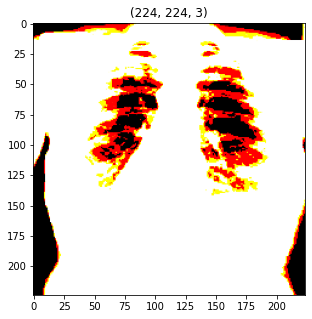

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


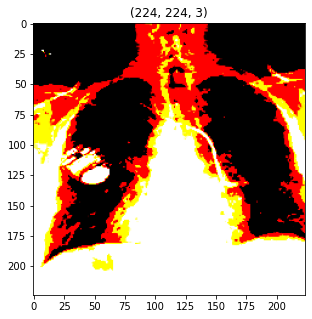

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


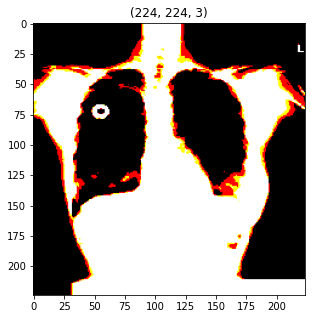

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


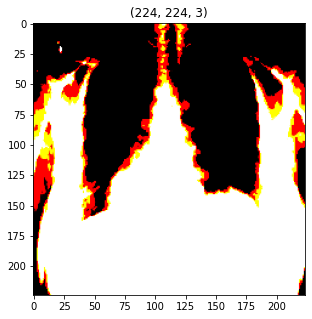

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


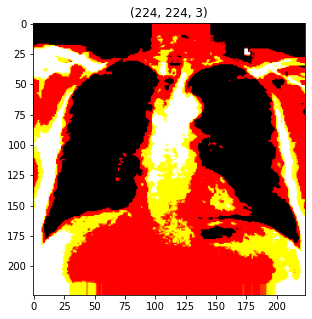

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


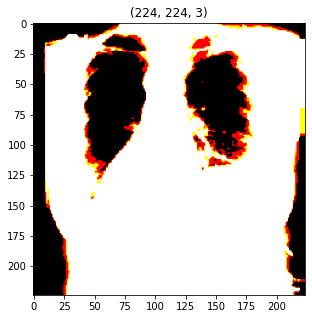

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


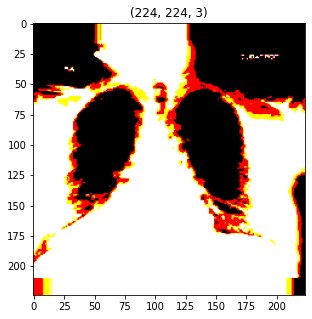

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


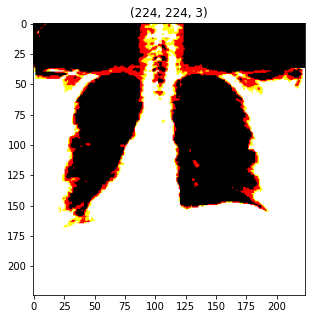

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


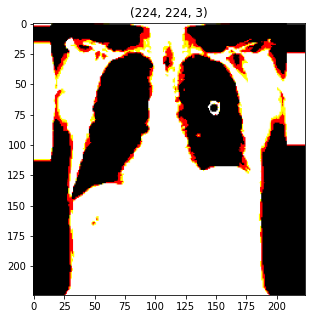

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


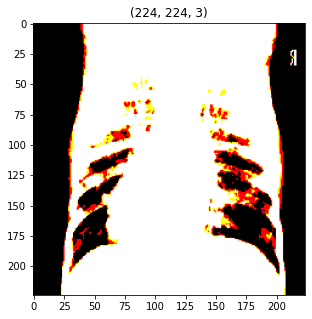

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


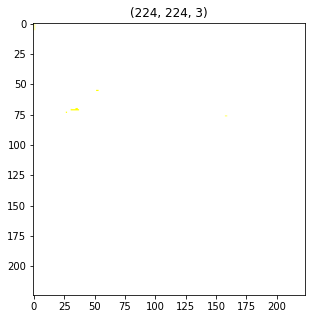

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


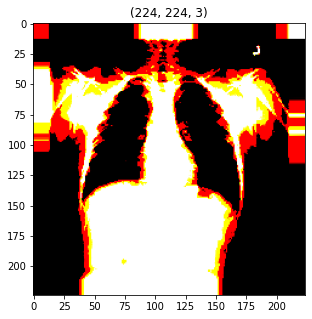

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


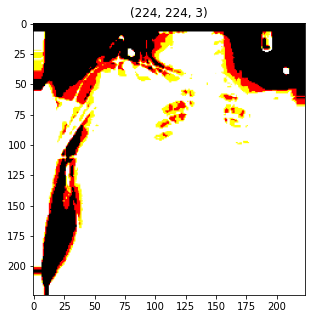

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


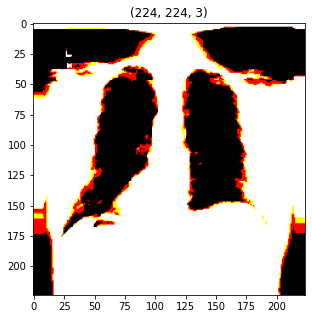

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


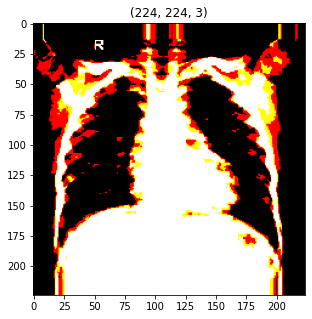

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


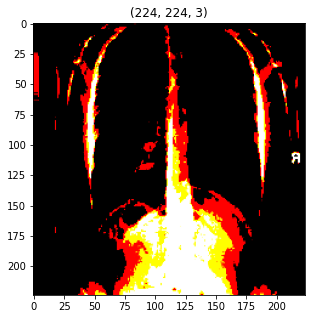

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


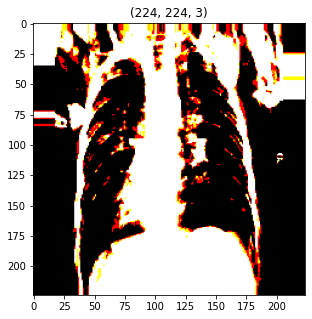

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


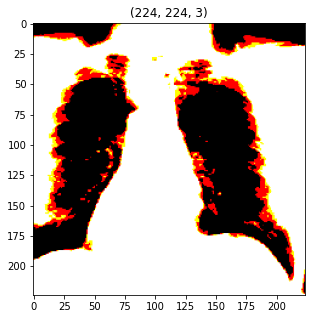

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


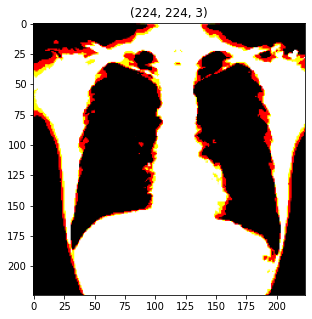

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


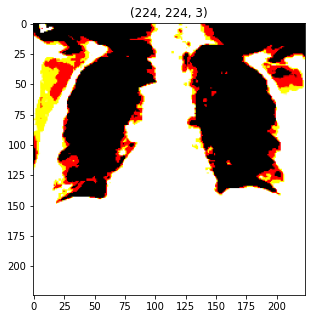

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


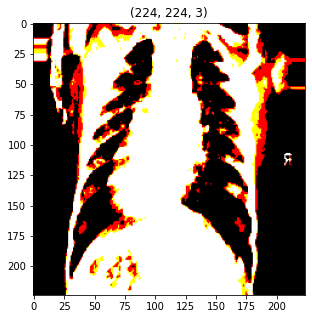

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


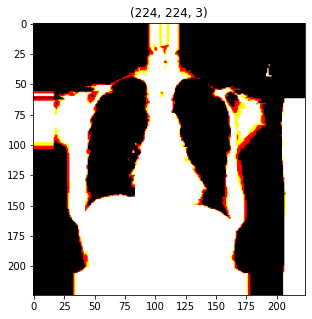

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


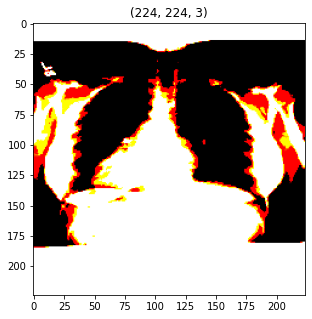

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


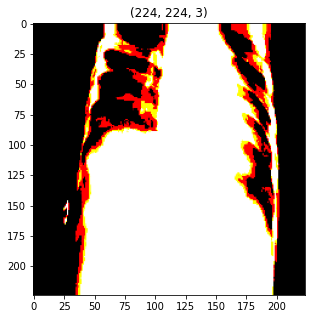

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


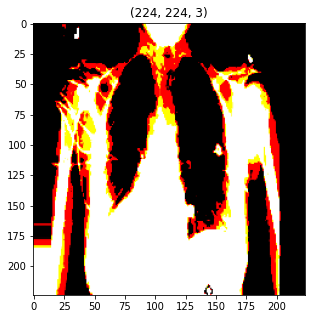

In [76]:
# function call to plot the images

plotImages(t_img, label)

## We will use ResNet50 as our pretrained base model

In [104]:
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Dropout

In [105]:
res  = ResNet50( input_shape=(224,224,3), include_top=False)

In [106]:
# We won't train all parameters again
for layer in res.layers:
  layer.trainable = False

In [107]:
x = Flatten()(res.output)
out = Dense(units=2, activation='sigmoid', name='predictions')(x)


# Creating our model
model = Model(inputs=res.input, outputs=out)

In [108]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
__________________________________________________________________________________________________


In [109]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [185]:
ACCURACY_THRESHOLD = 0.95
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True

es  = myCallback()


In [186]:
hist = model.fit(train, steps_per_epoch=10, epochs=30, validation_data=valid, validation_steps=16, callbacks=[es])

Epoch 1/30
10/10 [==============================] - 9s 931ms/step - loss: 2.0142 - accuracy: 0.9281 - val_loss: 1.8450 - val_accuracy: 0.9043
Epoch 2/30
10/10 [==============================] - 9s 922ms/step - loss: 1.7387 - accuracy: 0.9187 - val_loss: 2.4402 - val_accuracy: 0.9004
Epoch 3/30
10/10 [==============================] - 9s 926ms/step - loss: 1.4886 - accuracy: 0.9219 - val_loss: 1.8699 - val_accuracy: 0.9160
Epoch 4/30
10/10 [==============================] - 9s 921ms/step - loss: 1.2352 - accuracy: 0.9469 - val_loss: 2.1656 - val_accuracy: 0.9180
Epoch 5/30
10/10 [==============================] - 9s 922ms/step - loss: 1.6525 - accuracy: 0.9094 - val_loss: 1.4910 - val_accuracy: 0.9297
Epoch 6/30
10/10 [==============================] - 9s 913ms/step - loss: 1.0975 - accuracy: 0.9281 - val_loss: 1.5109 - val_accuracy: 0.9258
Epoch 7/30
10/10 [==============================] - 9s 930ms/step - loss: 1.2780 - accuracy: 0.9344 - val_loss: 1.4786 - val_accuracy: 0.9199
Epoch 

In [187]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [190]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc * 100} %")

The accuracy of your model is = 89.49999809265137 %


In [191]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

# Detecting if Covid +ve or not

The given X-Ray image is of type = Covid

The chances of image being Covid is : 99.99674558639526 percent

The chances of image being Normal is : 0.022909807739779353 percent


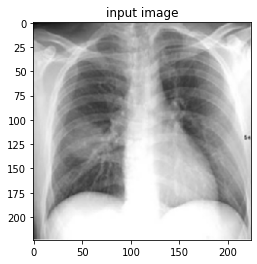

In [193]:
# path for that new image. ( you can take it either from google or any other scource)

path = "/content/COVID-19_Radiography_Dataset/COVID/COVID-1002.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image  
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()